In [4]:
import pandas as pd
data=pd.read_csv(r'F:\SAUVGARDE 2020\user\Desktop\data.csv',sep=';')
data.head()

,Unnamed: 0,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,0,2,Mrs,1,28,0,0,13,S,0
1,1,0,3,Mrs,1,25,0,0,"7,65",S,0
2,2,0,3,Mrs,1,20,0,0,"7,8542",S,0
3,3,0,3,Mrs,0,29,0,4,"21,075",S,4
4,4,0,1,Mrs,1,31,1,0,52,S,1


In [6]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass', 'FamilySize','Sex']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


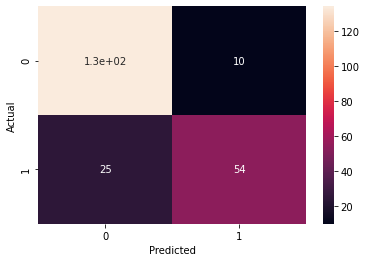

In [8]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       144
           1       0.84      0.68      0.76        79

    accuracy                           0.84       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



In [10]:
#logistical regression sur ces données est meilleur pour déterminer le nombre de non survivants


AUC Score: 0.82


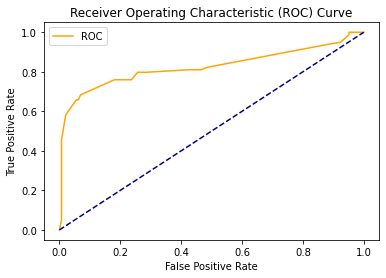

In [20]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc,accuracy_score, classification_report,roc_auc_score
import matplotlib.pyplot as plt
pred_prob = logreg.predict_proba(x_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#ROC axe x false positive & axe y true positive
#l'AUC comme une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire